In [1]:
!pip install yfinance matplotlib pandas

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Stock symbol and time period
symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2022-01-01'
end_date = '2024-12-31'

# Download data
df = yf.download(symbol, start=start_date, end=end_date)

# Show first few rows
df.head()

/tmp/ipython-input-3-2106919268.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645645,179.499574,174.425140,174.542917,104487900
2022-01-04,176.378342,179.558457,175.809061,179.254190,99310400
2022-01-05,171.686722,176.839679,171.411899,176.290033,94537600
2022-01-06,168.820679,172.059683,168.467333,169.507737,96904000
2022-01-07,168.987549,170.921136,167.868622,169.694241,86709100


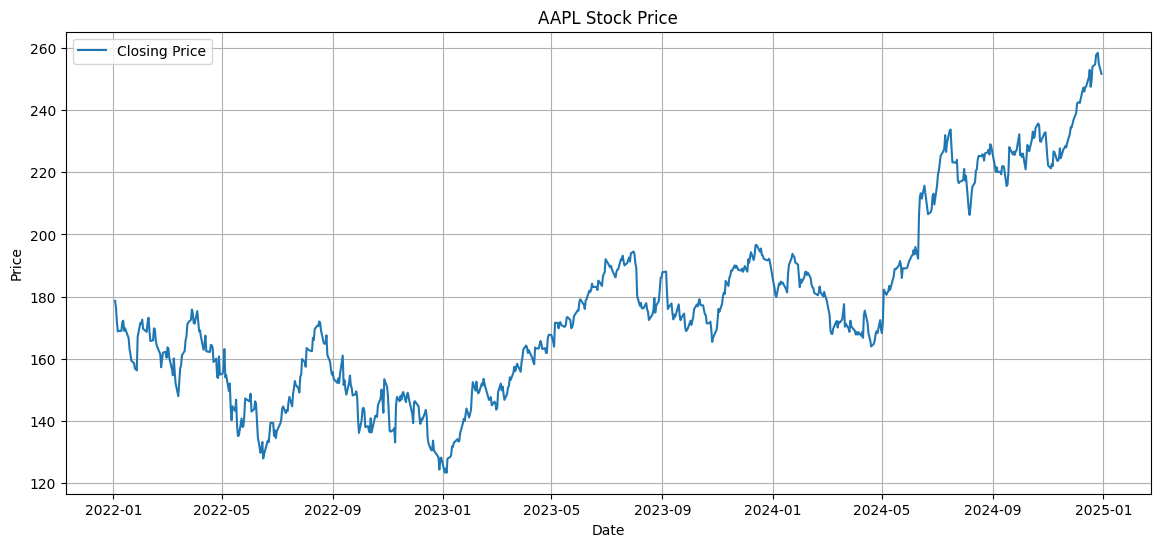

In [4]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Closing Price')
plt.title(f'{symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()

In [6]:
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

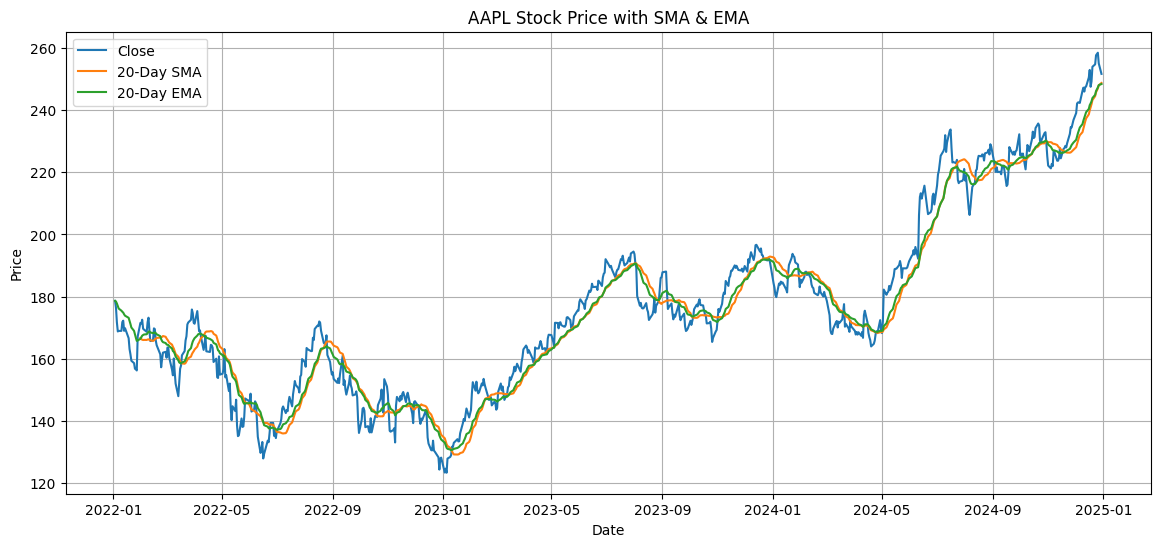

In [7]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['SMA_20'], label='20-Day SMA')
plt.plot(df['EMA_20'], label='20-Day EMA')
plt.title(f'{symbol} Stock Price with SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# RSI Function
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Apply to dataset
df['RSI'] = calculate_rsi(df)

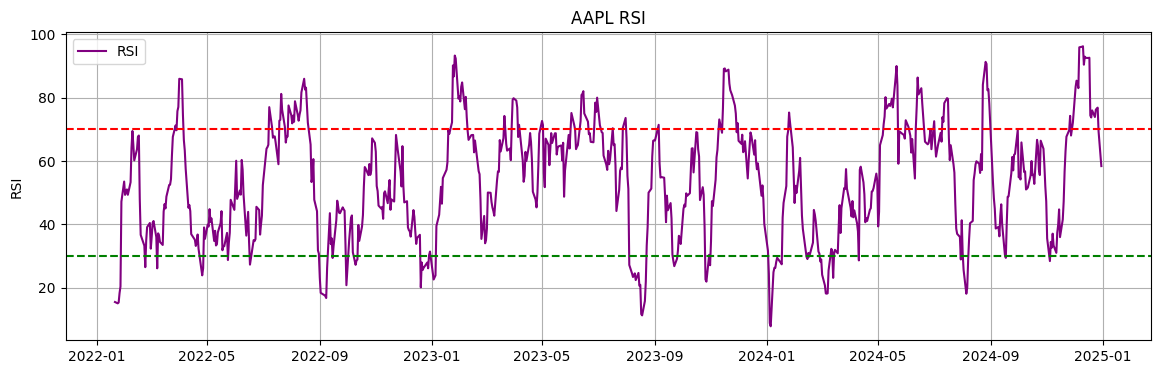

In [9]:
plt.figure(figsize=(14,4))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')   # Overbought
plt.axhline(30, color='green', linestyle='--') # Oversold
plt.title(f'{symbol} RSI')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Calculate MACD line and Signal line
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

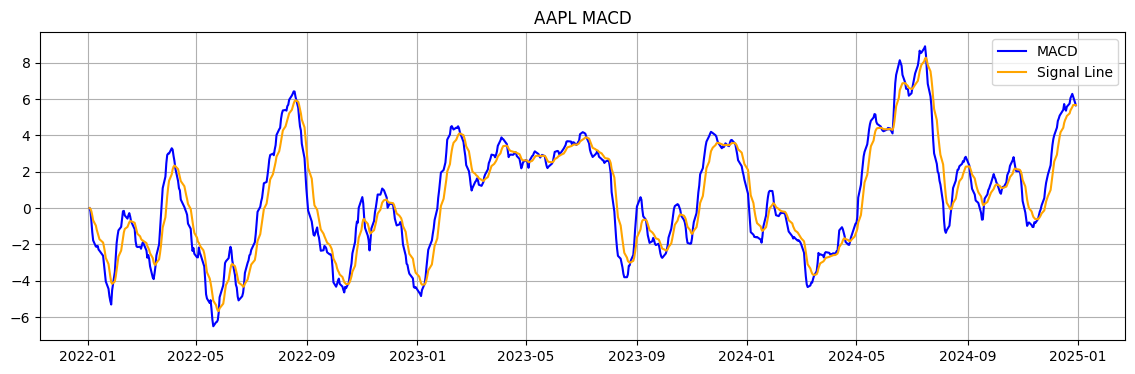

In [11]:
plt.figure(figsize=(14,4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['Signal_Line'], label='Signal Line', color='orange')
plt.title(f'{symbol} MACD')
plt.legend()
plt.grid(True)
plt.show()